In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

### Validating the approach

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 54ms/step - loss: 0.1230 - accuracy: 0.8348 - val_loss: 0.0872 - val_accuracy: 0.8798
Epoch 2/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0495 - accuracy: 0.9379 - val_loss: 0.0912 - val_accuracy: 0.8797
Epoch 3/20
59/59 [==============================] - 2s 28ms/step - loss: 0.0311 - accuracy: 0.9641 - val_loss: 0.0959 - val_accuracy: 0.8792
Epoch 4/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0217 - accuracy: 0.9768 - val_loss: 0.1036 - val_accuracy: 0.8752
Epoch 5/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0210 - accuracy: 0.9763 - val_loss: 0.1124 - val_accuracy: 0.8674
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0203 - accuracy: 0.9767 - val_loss: 0.1175 - val_accuracy: 0.8643
Epoch 7/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0191 - accuracy: 0.9784 - val_loss: 0.1181 - val_accuracy: 0.8662
Epoch 8/20
59

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the train & Validation loss

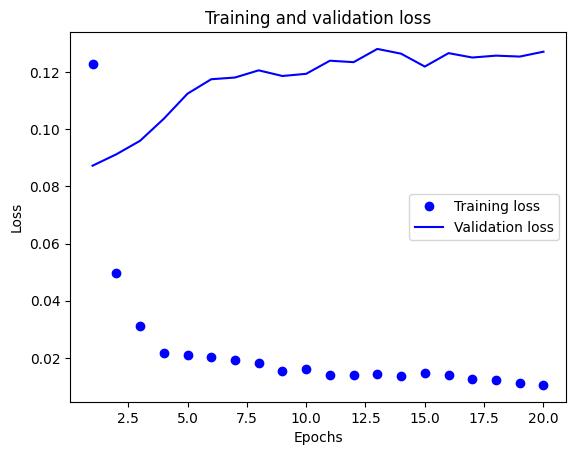

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

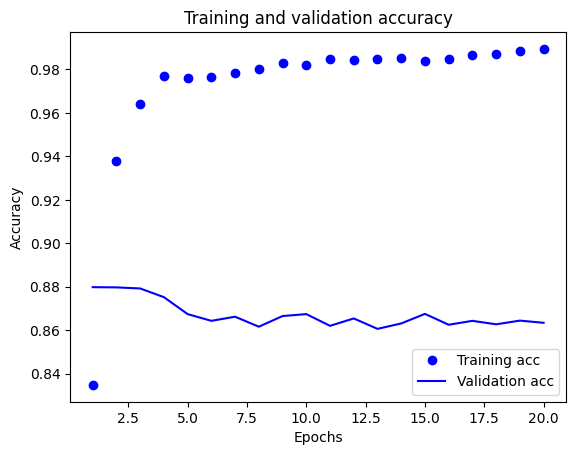

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1425 - accuracy: 0.8470


In [16]:
results

[0.14248090982437134, 0.8469600081443787]

#### Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 3s 38ms/step - loss: 1.4545 - accuracy: 0.7725 - val_loss: 1.1146 - val_accuracy: 0.8816
Epoch 2/20
59/59 [==============================] - 1s 22ms/step - loss: 0.8896 - accuracy: 0.9017 - val_loss: 0.6793 - val_accuracy: 0.8881
Epoch 3/20
59/59 [==============================] - 1s 23ms/step - loss: 0.5052 - accuracy: 0.9279 - val_loss: 0.3769 - val_accuracy: 0.8881
Epoch 4/20
59/59 [==============================] - 2s 32ms/step - loss: 0.2507 - accuracy: 0.9463 - val_loss: 0.1969 - val_accuracy: 0.8859
Epoch 5/20
59/59 [==============================] - 2s 26ms/step - loss: 0.1224 - accuracy: 0.9550 - val_loss: 0.1312 - val_accuracy: 0.8831
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0840 - accuracy: 0.9640 - val_loss: 0.1171 - val_accuracy: 0.8859
Epoch 7/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0718 - accuracy: 0.9672 - val_loss: 0.1140 - val_accuracy: 0.8830
Epoch 8/20
59

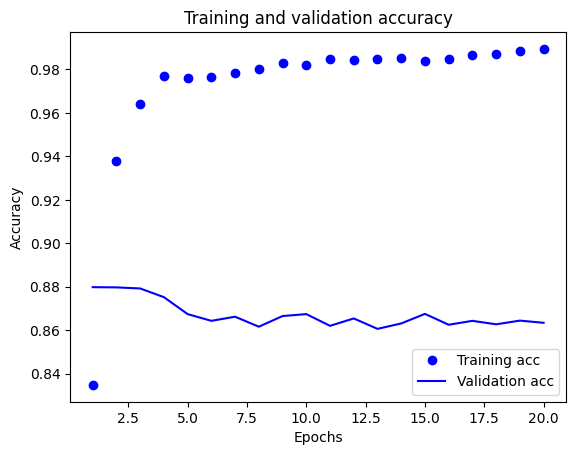

782/782 [==============================] - 2s 2ms/step - loss: 0.1242 - accuracy: 0.8611


[0.12421923130750656, 0.8611199855804443]

In [17]:
## Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 3 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(x_test, y_test)
results
